In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
import re
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amkish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/amkish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amkish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/amkish/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amkish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
dataset = pd.read_csv('tripadvisor_hotel_reviews.csv')

dataset.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [3]:
dataset = pd.DataFrame(dataset)

# Define a mapping for replacement
rating_mapping = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}

# Replace the numerical values with labels
dataset['Target_Label'] = dataset['Rating'].replace(rating_mapping)

# Display the result
dataset.head(10)

,Review,Rating,Target_Label
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive
5,love monaco staff husband stayed hotel crazy w...,5,Positive
6,"cozy stay rainy city, husband spent 7 nights m...",5,Positive
7,"excellent staff, housekeeping quality hotel ch...",4,Positive
8,"hotel stayed hotel monaco cruise, rooms genero...",5,Positive
9,excellent stayed hotel monaco past w/e delight...,5,Positive


In [4]:
# Calculate the sum of each unique value in the 'Rating' column
Target_Label_sums = dataset.groupby('Target_Label').size().reset_index(name='Count')

# Display the result
Target_Label_sums

,Target_Label,Count
0,Negative,3214
1,Neutral,2184
2,Positive,15093


In [5]:
dataset.describe(include='all')

,Review,Rating,Target_Label
count,20491,20491.000000,20491
unique,20491,NaN,3
top,nice hotel expensive parking got good deal sta...,NaN,Positive
freq,1,NaN,15093
mean,NaN,3.952223,NaN
std,NaN,1.233030,NaN
min,NaN,1.000000,NaN
25%,NaN,3.000000,NaN
50%,NaN,4.000000,NaN
75%,NaN,5.000000,NaN


In [6]:
dataset.head()

,Review,Rating,Target_Label
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


In [7]:
dataset.isnull().sum()

Review          0
Rating          0
Target_Label    0
dtype: int64

In [8]:
# selecting features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['Review'])
X = pd.DataFrame(X.toarray())
y = dataset['Target_Label']
X.head()

,0,1,2,3,4,5,6,7,8,9,...,52913,52914,52915,52916,52917,52918,52919,52920,52921,52922
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# lets now create a function to apply all our data preprocessing steps which we can then use on a corpus
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)  # tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #remove
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]  # stemming
    return stemmed_text

In [10]:
from sklearn.model_selection import train_test_split

y = dataset['Target_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 99)

<Axes: xlabel='Target_Label', ylabel='count'>

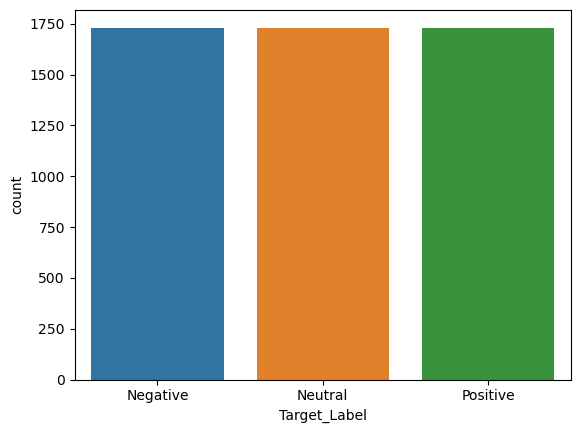

In [11]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)

In [12]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)
print(y_pred.tolist())

['Neutral', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'P

In [14]:
print(y_test.tolist())

['Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Posit

In [15]:
#computing the accuracy and making the confusion matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('\n\n')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy: 0.75


Confusion Matrix:
[[ 529  145    8]
 [  82  300   71]
 [  67  663 2234]] 


-----------------------------------------------------------
-----------------------------------------------------------



Classification Report:

              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78       682
     Neutral       0.27      0.66      0.38       453
    Positive       0.97      0.75      0.85      2964

    accuracy                           0.75      4099
   macro avg       0.67      0.73      0.67      4099
weighted avg       0.86      0.75      0.78      4099



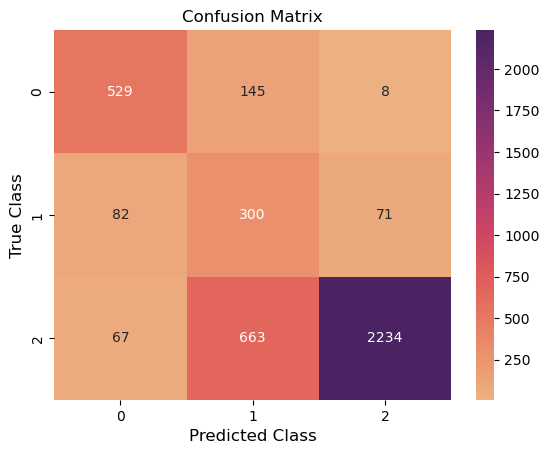

In [16]:
ax = sns.heatmap(cm, cmap ='flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

# Sentiment Analysis

In [17]:
# Initialize the SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [18]:
dataset['compound'] = [sentiment.polarity_scores(review)['compound'] for review in dataset['Review']]
dataset['neg'] = [sentiment.polarity_scores(review)['neg'] for review in dataset['Review']]
dataset['neu'] = [sentiment.polarity_scores(review)['neu'] for review in dataset['Review']]
dataset['pos'] = [sentiment.polarity_scores(review)['pos'] for review in dataset['Review']]

In [19]:
dataset.head()

,Review,Rating,Target_Label,compound,neg,neu,pos
0,nice hotel expensive parking got good deal sta...,4,Positive,0.9747,0.072,0.643,0.285
1,ok nothing special charge diamond member hilto...,2,Negative,0.9787,0.110,0.701,0.189
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,0.9889,0.081,0.700,0.219
3,"unique, great stay, wonderful time hotel monac...",5,Positive,0.9912,0.060,0.555,0.385
4,"great stay great stay, went seahawk game aweso...",5,Positive,0.9797,0.135,0.643,0.221


In [20]:
dataset[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,20491.000000,20491.000000,20491.000000,20491.000000
mean,0.803430,0.071908,0.617716,0.310376
std,0.455671,0.065673,0.101765,0.124714
min,-0.997400,0.000000,0.123000,0.000000
25%,0.918400,0.025000,0.556000,0.226000
50%,0.973800,0.059000,0.625000,0.303000
75%,0.988800,0.103000,0.687000,0.388000
max,0.999900,0.646000,1.000000,0.818000


<Axes: xlabel='compound', ylabel='Count'>

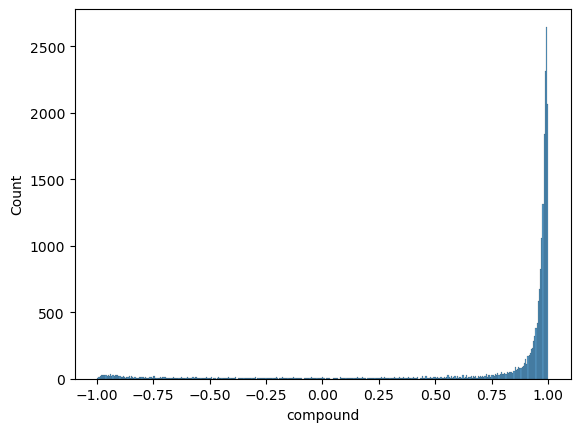

In [21]:
sns.histplot(dataset['compound'])

<Axes: xlabel='pos', ylabel='Count'>

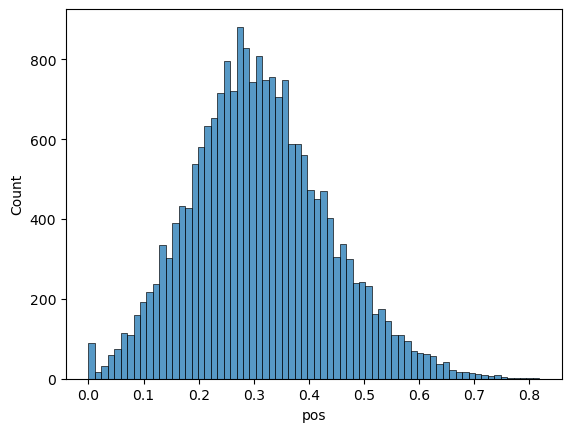

In [22]:
sns.histplot(dataset['pos'])

<Axes: xlabel='neg', ylabel='Count'>

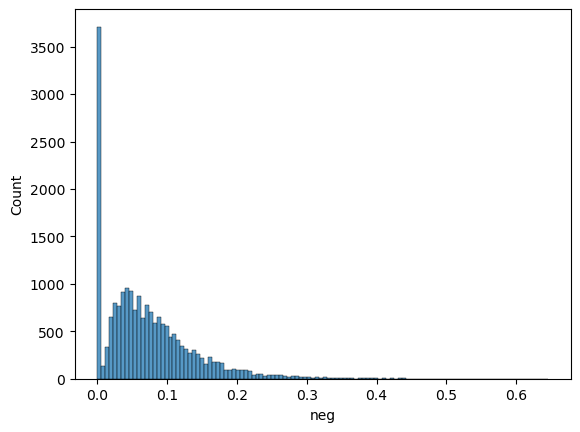

In [23]:
sns.histplot(dataset['neg'])

In [24]:
# Calculate the total number of reviews for each sentiment label
total_reviews = dataset.groupby('Target_Label').size()

# Calculate the total number of negative reviews
total_negative_rev = dataset[dataset['compound'] <= 0].groupby('Target_Label').size()

# Calculate the total number of positive reviews
total_positive_rev = dataset[dataset['compound'] > 0].groupby('Target_Label').size()

# Calculate the total number of neutral reviews
total_neutral_rev = dataset[dataset['compound'] == 0].groupby('Target_Label').size()

# Calculate the percentage of negative reviews
negative_percentage = (total_negative_rev / total_reviews * 100).reset_index(name='% neg reviews')

# Calculate the percentage of positive reviews
positive_percentage = (total_positive_rev / total_reviews * 100).reset_index(name='% pos reviews')

# Calculate the percentage of neutral reviews
neutral_percentage = (total_neutral_rev / total_reviews * 100).reset_index(name='% neutral reviews')

# Sort by the percentage of negative reviews
negative_percentage = negative_percentage.sort_values(by='% neg reviews')

# Sort by the percentage of positive reviews
positive_percentage = positive_percentage.sort_values(by='% pos reviews')

# Sort by the percentage of neutral reviews
neutral_percentage = neutral_percentage.sort_values(by='% neutral reviews')

print("Negative Reviews:")
print(negative_percentage)

print("\nPositive Reviews:")
print(positive_percentage)

print("\nNeutral Reviews:")
print(neutral_percentage)


Negative Reviews:
  Target_Label  % neg reviews
2     Positive       0.722189
1      Neutral       8.104396
0     Negative      41.785937

Positive Reviews:
  Target_Label  % pos reviews
0     Negative      58.214063
1      Neutral      91.895604
2     Positive      99.277811

Neutral Reviews:
  Target_Label  % neutral reviews
2     Positive           0.019877
1      Neutral           0.137363
0     Negative           0.186683


In [25]:
# Extract words for each sentiment category
positive_reviews_words = ' '.join(dataset[dataset['Target_Label'] == 'Positive']['Review'])
neutral_reviews_words = ' '.join(dataset[dataset['Target_Label'] == 'Neutral']['Review'])
negative_reviews_words = ' '.join(dataset[dataset['Target_Label'] == 'Negative']['Review'])

# Generate WordCloud for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_reviews_words)
neutral_wordcloud = WordCloud(width=800, height=400).generate(neutral_reviews_words)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_reviews_words)

In [26]:
# Tokenize the text and remove punctuation
tokens_negative = [word.lower() for word in word_tokenize(negative_reviews_words) if word.isalpha()]
tokens_neutral = [word.lower() for word in word_tokenize(neutral_reviews_words) if word.isalpha()]
tokens_positive = [word.lower() for word in word_tokenize(positive_reviews_words) if word.isalpha()]

In [27]:
# Creating frequency distributions for each sentiment
fdist_negative = FreqDist(tokens_negative)
fdist_neutral = FreqDist(tokens_neutral)
fdist_positive = FreqDist(tokens_positive)

# Display the most common words for each sentiment
print("Negative Sentiment:")
print(fdist_negative.most_common(10))

print("\nNeutral Sentiment:")
print(fdist_neutral.most_common(10))

print("\nPositive Sentiment:")
print(fdist_positive.most_common(10))

Negative Sentiment:
[('not', 8998), ('hotel', 7762), ('room', 7524), ('no', 3553), ('did', 3138), ('stay', 2574), ('rooms', 2250), ('staff', 2244), ('good', 2091), ('just', 2064)]

Neutral Sentiment:
[('hotel', 5064), ('not', 4740), ('room', 4433), ('good', 2457), ('did', 1929), ('great', 1754), ('nice', 1744), ('no', 1652), ('rooms', 1480), ('staff', 1471)]

Positive Sentiment:
[('hotel', 35985), ('room', 22313), ('great', 18108), ('not', 17804), ('staff', 12482), ('good', 12418), ('stay', 11157), ('nice', 9244), ('just', 9072), ('did', 8828)]


In [28]:
# Generating WordCloud for each sentiment category
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


Positive Sentiment:


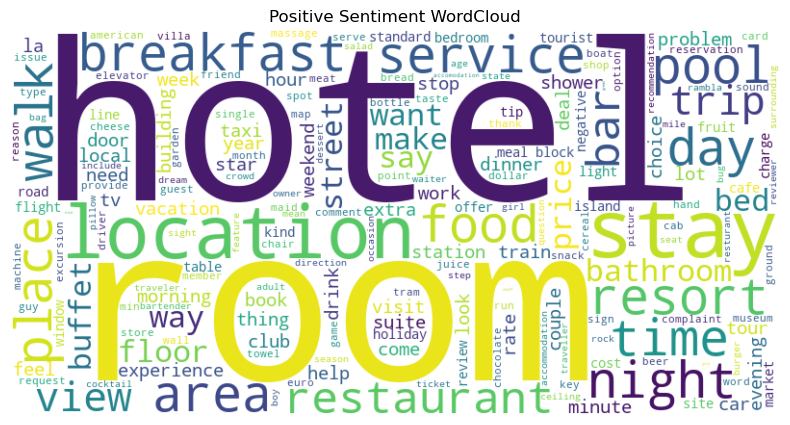

In [29]:
# Displaying the most common words for each sentiment
def display_most_common(fdist, title):
    print(f"\n{title} Sentiment:")
    common_words = fdist.most_common(2000)
    if not common_words:
        print(f"No words found for {title} sentiment.")
    else:
        generate_wordcloud(' '.join([word[0] for word in common_words]), f'{title} Sentiment WordCloud')

# WordCloud of positive sentiments
display_most_common(fdist_positive, 'Positive')


Neutral Sentiment:


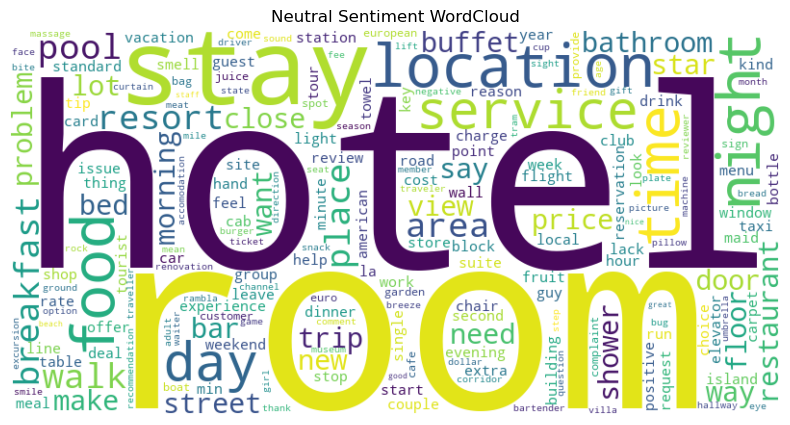

In [30]:
# WordCloud of neutral sentiments
display_most_common(fdist_neutral, 'Neutral')


Negative Sentiment:


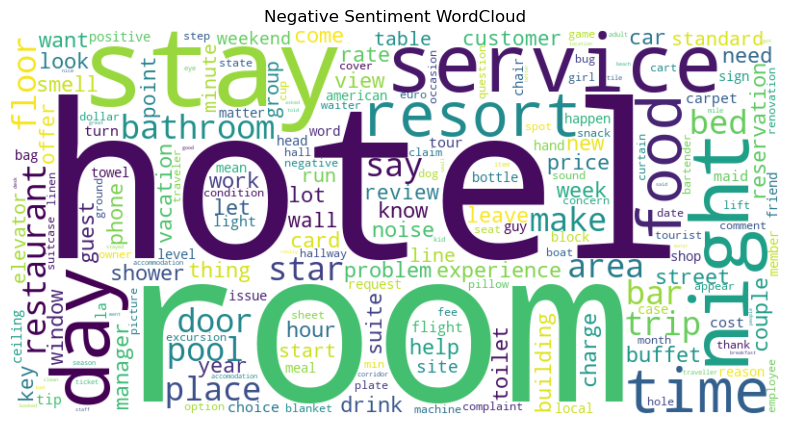

In [31]:
# WordCloud of negative sentiments
display_most_common(fdist_negative, 'Negative')

In [32]:
# Compute accuracy for sentiment analysis
accuracy_sentiment = accuracy_score(y, model.predict(X))

# Display the accuracy
print(f"Accuracy for Sentiment Analysis: {accuracy_sentiment:.2%}")

Accuracy for Sentiment Analysis: 77.93%
